# logistic 回归

class sklearn.linear_model.LogisticRegression(penalty='l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

参数说明

penalty='l2’, 正则化参数（惩罚项），可取值'l1','l2','elasticnet','none'，默认值'l2'。  
dual=False, 对偶或原始公式，对偶公式只适用于l2罚项的liblinear求解器。样本数大于特征数时，默认为False。  
tol=0.0001, 停止迭代的阈值。  
C=1.0, 正则化系数lambda的倒数，取值须大于0。  
fit_intercept=True, 模型是否加入截距项，默认加入截距项。  
intercept_scaling=1, 当求解器为liblinear，且fit_intercept为True时，才会起作用。  
class_weight=None, 类别权重  
random_state=None, 随机种子，solver取值‘sag’或‘liblinear’时起作用。  
solver=’liblinear’,求解器，最优化问题中应用的算法。

- libnear：使用坐标轴下降法来迭代优化损失函数。  
- lbfgs：一种拟牛顿法，利用损失函数的二阶导数（海森矩阵）来迭代优化损失函数，推荐用于较小的数据集。  
- newton-cg：拟牛顿法的一种，利用损失函数的二阶导数（海森矩阵）来迭代优化损失函数。  
- sag：随机平均梯度下降，每次迭代仅使用一部分样本来计算梯度，适合样本量多的情况。  
- saga：是sag的一种变体，支持非平滑（non-smooth）的 L1 正则选项 penalty="l1" 。因此对于稀疏多项式 logistic 回归 ，往往选用该求解器。  

max_iter=100, 最大迭代次数  
multi_class=’ovr’,多分类问题分类方式选择参数，可取值"ovr"、"multinomial"、"auto"，'ovr'：one vs rest 一对剩余，'multinomial'：many vs many。对于多跟类问题，multinomial 分类相对准确，但速度相对慢。  
verbose=0, 日志冗长度int：冗长度；0：不输出训练过程；1：偶尔输出； >1：对每个子模型都输出。  
warm_start=False, 是否热启动，如果是，则下一次训练是以追加树的形式进行（重新使用上一次的调用作为初始化），bool：热启动，False：默认值。  
n_jobs=None, 并行数，int：个数；-1：跟CPU核数一致；1:默认值  
l1_ratio=None，弹性网络的混合参数，0 <= l1_ratio <= 1，只在penalty='elasticnet'时使用。  

### 二分类问题

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
%matplotlib inline
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
clf = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
clf.coef_

array([[  1.54678711e+00,   8.23352559e-02,   1.55276075e-01,
         -8.79367079e-04,  -8.22163107e-02,  -2.85329468e-01,
         -4.58468993e-01,  -2.42749600e-01,  -2.24301857e-01,
         -1.22379599e-02,   6.15455279e-03,   2.92238035e-01,
          1.80011887e-01,  -7.24131937e-02,  -7.77191444e-03,
         -1.44373787e-02,  -6.20589590e-02,  -3.52459954e-02,
         -4.49914397e-02,   3.16257990e-03,   1.18775647e+00,
         -2.28662001e-01,  -2.69895926e-01,  -2.42563451e-02,
         -1.35120118e-01,  -7.09409177e-01,  -1.14965142e+00,
         -4.78814355e-01,  -4.95780257e-01,  -6.67372595e-02]])

In [44]:
clf.score(X_test, y_test)

0.95438596491228067

In [45]:
clf.predict(X_test)[:3]

array([0, 1, 1])

In [46]:
clf.predict_proba(X_test)[:,0][:3]

array([ 0.9950637 ,  0.02889724,  0.00272001])

In [47]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

In [48]:
auc(fpr, tpr)

0.99182092122255705

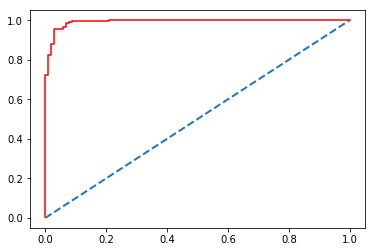

In [49]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red')
plt.plot([0,1], [0,1], lw=2, linestyle='--')
plt.show()

### 多分类问题

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state


In [26]:
# t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True, cache=False)
import pandas as pd
# mnist = pd.read_csv('C:/Users/Administrator/Downloads/mnist_784.csv', 
#                     iterator=True)
data = pd.read_csv('C:/Users/Administrator/Downloads/mnist_784.csv', sep=',', 
                   engine='python', iterator=True)
loop = True
chunkSize = 10000
chunks = []
while loop:
    try:
        chunk = data.get_chunk(chunkSize)
        chunks.append(chunk)
    except StopIteration:
        loop = False
        print("Iteration is stopped.")
print('开始合并')
df_train = pd.concat(chunks, ignore_index=True)

Iteration is stopped.
开始合并


MemoryError: 